# Revealing Fandango's Movie Ratings Discrepancies: Pre and Post Controversy

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

Hickey found that there was a significant discrepancy between the number of stars displayed to users and the actual rating he was able to find in the HTML of the page.

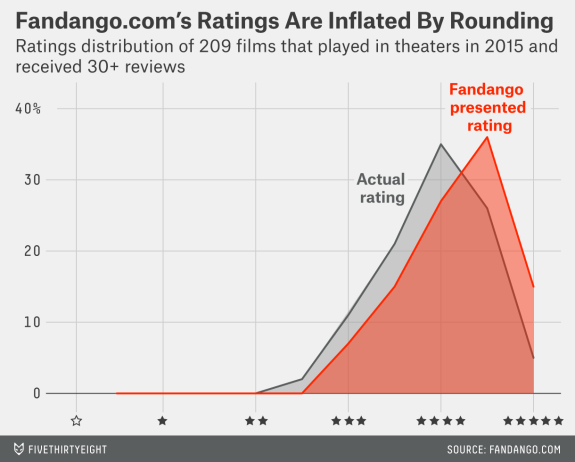

In this data science project, our goal is to examine whether there were any changes in Fandango's rating system following a previous analysis conducted in 2015. To reach this goal, we compare the characteristics of the rating system before and after the analysis, using data from films released in 2016 and 2017.

We found that both the 2015 and 2016 ratings distributions were left-skewed, with modes of 4.5 stars and 4 stars, respectively. However, the 2016 ratings appeared to be more normally distributed around the mode, while the 2015 ratings were heavily skewed towards higher rankings.

Interestingly, there were slight changes in the summary statistics for the 2015 ratings, with the mean decreasing from 4.0 to 3.9 and the mode shifting from 4.5 to 4.0. The median remained the same at 4.0 stars.

While it remains unclear whether the differences observed were a result of changes in Fandango's rating system or other factors, it is noteworthy that as of 2023, Fandango no longer explicitly displays 5-star ratings on their website, and their subsidiary, Rotten Tomatoes, employs a verified rating system.

Overall, our findings provide insight into the distribution and summary statistics of movie ratings on Fandango, highlighting potential changes that occurred in the rating system over time.

In [107]:
import pandas as pd

In [108]:
# Reading in the data sets
movies_2015 = pd.read_csv('fandango_score_comparison.csv')
movies_2015

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [109]:
movies_2016 = pd.read_csv('movie_ratings_16_17.csv')
movies_2016

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


We'll isolate the columns that provide information about Fandango's ratings into separate variables so that we only have the data we're interested in.

In [110]:
movies_2015_1 = movies_2015[['FILM',
                               'Fandango_Stars',
                               'Fandango_Ratingvalue',
                               'Fandango_votes',
                               'Fandango_Difference']].copy()
movies_2015_1

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [111]:
movies_2016_1 = movies_2016[['movie', 'year', 'fandango']].copy()
movies_2016_1

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


## Examining and Isolating the Data

The first dataset includes every movie that has a Rotten Tomatoes rating, an RT user rating, a Metacritic score, a Metacritic user score, an IMDb score, and at least 30 fan reviews on Fandango. The Fandango data was pulled on August 24, 2015.

The second dataset contains movie review data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.

Obviously, the sampling processes were not random, and the resulting samples are very unlikely to be representative of the population we're interested in describing.

Since it's not possible to re-collect data from the Fandango site prior to 2015, given the data sets we have, we will investigate whether there is a difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

We'll use Hickey's benchmark of 30 fan reviews, and consider a movie "popular" only if it has 30 or more fan reviews on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample does not provide information about the number of fan ratings. A quick way to check the representativeness of this sample is to randomly select 10 movies from it and then check the number of fan ratings on Fandango's website ourselves.

In [112]:
movies_2016_1.sample(n = 10, random_state = 10)

,movie,year,fandango
161,The Autopsy of Jane Doe,2016,4.5
120,Neighbors 2: Sorority Rising,2016,3.5
105,Masterminds,2016,3.5
148,Split,2016,4.0
69,Hidden Figures,2016,5.0
127,Ouija: Origin of Evil,2016,3.5
19,Beauty and the Beast,2017,4.5
175,The Forest,2016,3.0
47,Elvis & Nixon,2016,3.5
149,Star Trek Beyond,2016,4.5


In May 2019, Rotten Tomatoes, a subsidiary of Fandango, introduced a verified review system, replacing the previous system that only required users to register in order to submit a review. In addition to creating an account, users must now verify their ticket purchase through Fandango Media, a ticketing company of which Rotten Tomatoes is a subsidiary.

Given this fact, we will use the number of ratings on Rotten Tomatoes to check if the movie is popular:
- The Autopsy of Jane Doe: over 10k
- Neighbors 2: Sorority Rising: over 50k
- Masterminds: over 25k
- Split: over 50k
- Hidden Figures: over 50k
- Ouija: Origin of Evil: over 10k
- Beauty and the Beast: over 50k
- The Forest: over 10k
- Elvis & Nixon: over 5k
- Star Trek Beyond: over 50k

All of the movies in this sample are popular, so we can proceed with our analysis.

Next, we will isolate the movies released in 2015 and 2016.

In [113]:
# Adding the year column for movies released in 2015
movies_2015_1['year'] = movies_2015_1['FILM'].str.extract("(2015)")
movies_2015_1['year'].value_counts(dropna=False)

2015    129
NaN      17
Name: year, dtype: int64

In [114]:
# Isolating the movies released in 2015 fom the first data set
movies_2015_2 = movies_2015_1[movies_2015_1.year == '2015']
movies_2015_2

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
...,...,...,...,...,...,...
140,Inside Out (2015),4.5,4.5,15749,0.0,2015
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,2015
142,'71 (2015),3.5,3.5,192,0.0,2015
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,2015


In [115]:
# Storing Fandango ratings from 2015 as new variable
fandango_2015 = movies_2015_2['Fandango_Stars']

In [116]:
# Isolating the movies released in 2016 from the second data set
movies_2016_2 = movies_2016_1[movies_2016_1.year == 2016]
movies_2016_2

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5
208,Why Him?,2016,4.0
209,X-Men: Apocalypse,2016,4.0
212,Zoolander 2,2016,2.5


In [117]:
# Storing Fandango ratings from 2016 as new variable
fandango_2016 = movies_2016_2['fandango']

## Comparing Distribution Shapes

We will start with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

In [118]:
# Importing libraries for plotting
import matplotlib.pyplot as plt

import matplotlib.style as style
style.use("fivethirtyeight")
# We will use fivethirtyeight style for visualisation

%matplotlib inline
# Enables Jupyter to display graphs

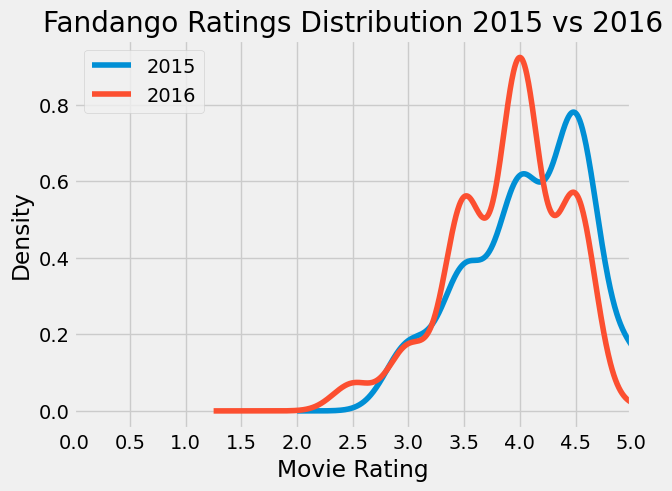

In [119]:
fandango_2015.plot.kde(label='2015')
fandango_2016.plot.kde(label='2016')
plt.title('Fandango Ratings Distribution 2015 vs 2016')
plt.legend()
plt.xlabel('Movie Rating')
plt.xlim(left=0, right=5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Both distributions are left skewed, with the modes for 2015 and 2016 being 4.5 and 4 stars, respectively. However, the 2016 ratings appear to be almost normally distributed around the mode, while the 2015 ratings are more extremely skewed toward high rankings.

It is unclear whether this difference is due to changes in Fandango's rating system or other factors.

## Comparing Relative Frequencies

The samples have different numbers of movies (129 vs. 191). Therefore, it makes more sense to compare the two tables using relative frequencies.

In [120]:
fandango_2015.value_counts(normalize=True)

4.5    0.379845
4.0    0.286822
3.5    0.178295
3.0    0.085271
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [121]:
fandango_2016.value_counts(normalize=True)

4.0    0.403141
4.5    0.246073
3.5    0.240838
3.0    0.073298
2.5    0.031414
5.0    0.005236
Name: fandango, dtype: float64

It is clear that there is a difference between two distributions, but the direction of the difference is not immediately clear from the frequency tables alone.

To get a clearer picture, we'll take each distribution of movie ratings and calculate its mean, median, and mode, and then compare these statistics to determine what they tell us about the direction of the difference.

In [122]:
statistics_2015 = pd.DataFrame({'2015':[fandango_2015.mean(),
                                        fandango_2015.median(),
                                        fandango_2015.mode().iloc[0]]},
                              index=['mean', 'median', 'mode'])
statistics_2015

,2015
mean,4.085271
median,4.000000
mode,4.500000


In [123]:
statistics_2016 = pd.DataFrame({'2016':[fandango_2016.mean(),
                                        fandango_2016.median(),
                                        fandango_2016.mode().iloc[0]]},
                              index=['mean', 'median', 'mode'])
statistics_2016

,2016
mean,3.887435
median,4.000000
mode,4.000000


In [124]:
statistics = pd.concat([statistics_2015, statistics_2016], axis=1)
statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


We will visualize these statistics for better understanding.

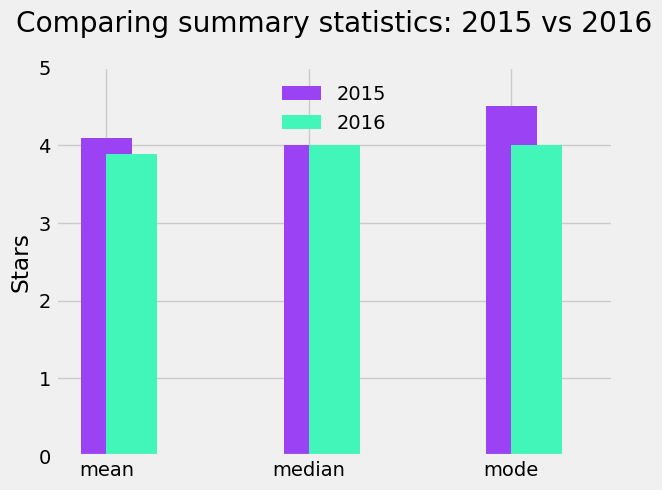

In [125]:
statistics['2015'].plot.bar(color='#9b42f5', align = 'center', label = '2015', width = .25)
statistics['2016'].plot.bar(color='#42f5b9', align = 'edge', label = '2016', width = .25, rot = 0)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5)
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

There were slight changes in the summary statistics for the 2015 ratings, with the mean decreasing from 4.0 to 3.9 and the mode shifting from 4.5 to 4.0. The median remained the same at 4.0 stars.

Although it is unclear whether the difference in summary statistics and distribution of ratings was due to changes in Fandango's rating system or other factors, it is worth noting that as of 2023, 5-star ratings are not explicitly displayed on the Fandango site, and ratings on Rotten Tomatoes (a subsidiary of Fandango) are based on a verified rating system.

# Conclusion

Our project aimed to examine changes in Fandango's rating system following a previous analysis conducted in 2015. We approached this goal by comparing the characteristics of the rating system before and after the analysis, using movie ratings data from 2015 and 2016.

Our findings revealed interesting insights into the distribution and summary statistics of movie ratings on Fandango. The ratings distributions for both 2015 and 2016 were left-skewed, with modes of 4.5 stars and 4 stars, respectively. However, the 2016 ratings appeared to be more normally distributed around the mode, while the 2015 ratings were heavily skewed towards higher rankings.

Notably, there were slight changes in the summary statistics for the 2015 ratings, with a decrease in the mean from 4.0 to 3.9 and a shift in the mode from 4.5 to 4.0, while the median remained unchanged at 4.0 stars.

While it remains unclear whether these differences can be attributed to changes in Fandango's rating system or other factors, it is worth noting that as of 2023, Fandango no longer explicitly displays 5-star ratings on their website, and their subsidiary, Rotten Tomatoes, utilizes a verified rating system.

In conclusion, our analysis provides valuable insights into the evolution of Fandango's rating system, highlighting possible changes in the distribution and summary statistics of movie ratings over time.